**QUESTION**: Can we predict which country a first time AirBnB user will book (or no booking) based on their demographic data and marketing acquisition path?

**DATA**: A dataset from AirBnB with the features below:
- 'date_account_created'
- 'timestamp_first_active'
- 'date_first_booking'
- 'gender'
- 'age'
- 'signup_method'
- 'signup_flow'
- 'language'
- 'affiliate_channel'
- 'affiliate_provider'
- 'first_affiliate_tracked'
- 'signup_app'
- 'first_browser'
- 'country_destination'


In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
url = '/Users/jennawhite/documents/gaclass/wild_west/abnb_project/data/train_users_2.csv'

bnb = pd.read_csv(url, index_col='id')


  
### Pre-processing###  

*When looking through the data, I found that there were three features that contained null values. After digging into the recorded values in each feature, I made the following decisions on how to handle the NaN values:*

**date_first_booking**:  
This feature contains timestamps (year-month-day) of when the account holder had their first booking. It also had a NaN value for those who had not booked. I replaced the NaNs with '0', allowing me to also build a dummy variable called 'booked' after.

**first_affiliate_tracked**:  
The most populous value in this feature was 'untracked'. There were also 6000+ NaN values (roughly 3% of the observations). Since the % of total observations were low and I felt that NaN was analogous to untracked (in that there was no data on first affiliates for either value), I replaced NaN with 'untracked'. 

**age**:  
When I created a histogram of the data for 'age' I found a few peculiarities. First, the general histogram looked like this:




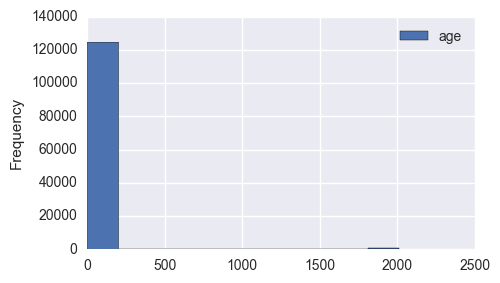

In [49]:
bnb.plot(kind='hist',y='age',figsize=(5,3))

**It was strange that the scale of the x-axis went all the way out to 2500, so I dug in on the outlier:**

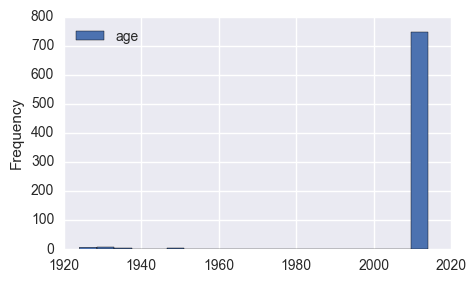

In [51]:
bnb[bnb['age']>1000].plot(kind='hist', y='age', bins=20, figsize=(5,3))

**Specifically, it came out that the large pop was due to people inputting 2014 or 2013 -- most likey the year of signup...not of birth. When looking closer at the beginning of the x-axis I noticed that there were also a significant number of people selecting an age over 80:**


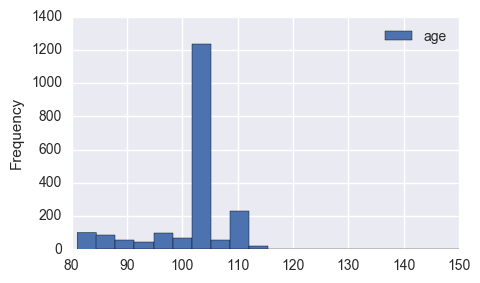

In [57]:
bnb2 = bnb[bnb['age']<1000]
bnb2[bnb2['age']>80].plot(kind='hist', y='age', bins=20, figsize=(5,3))


In [71]:
a = bnb2[bnb2['age']>80]
a['age'].value_counts().head(3)
#you can see that the value counts drop quickly -- 105 must have been a default
# of some sort at some time.

105.0    1131
110.0     196
95.0       49
Name: age, dtype: int64

**Since Ages>80 only accounted for 1.3% of the total observations (or 2771), I decided to drop rows from the dataset where that condition was true.  
  
**But an additional factor in this feature is that there were 89K+ rows that had NaN values. I felt that was too many (~40%) values to drop the rows.

In [64]:
bnb.isnull().any()

date_account_created       False
timestamp_first_active     False
date_first_booking         False
gender                     False
age                         True
signup_method              False
signup_flow                False
language                   False
affiliate_channel          False
affiliate_provider         False
first_affiliate_tracked     True
signup_app                 False
first_device_type          False
first_browser              False
country_destination        False
dtype: bool

In [44]:
bnb.date_first_booking.fillna(0, inplace=True)


In [45]:
pd.Series(bnb.first_affiliate_tracked).value_counts()

untracked        109232
linked            46287
omg               43982
tracked-other      6156
product            1556
marketing           139
local ops            34
Name: first_affiliate_tracked, dtype: int64